**Customer Behavior Analysis**

In [1]:
!pip install kagglehub pandas numpy matplotlib seaborn

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [16]:
path = kagglehub.dataset_download("bhanupratapbiswas/customer-behavior-analysis")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/customer-behavior-analysis


In [17]:
import os

for root, dirs, files in os.walk(path):
    for file in files:
        print("✅ Found file:", os.path.join(root, file))


✅ Found file: /kaggle/input/customer-behavior-analysis/ecommerce_customer_data_large.csv
✅ Found file: /kaggle/input/customer-behavior-analysis/ecommerce_customer_data_custom_ratios.csv


In [18]:
df = pd.read_csv('/kaggle/input/customer-behavior-analysis/ecommerce_customer_data_large.csv')
df.head()


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [19]:
# Info about dataset
df.info()

# Missing values
print("Missing values:\n", df.isnull().sum())

# Drop or fill nulls
df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB
Missing values:
 Customer ID   

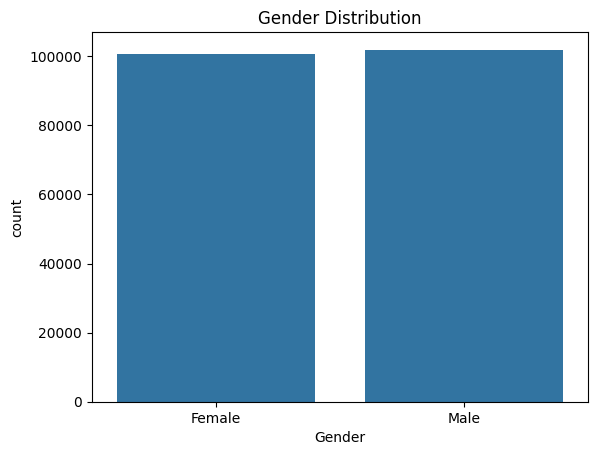

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()


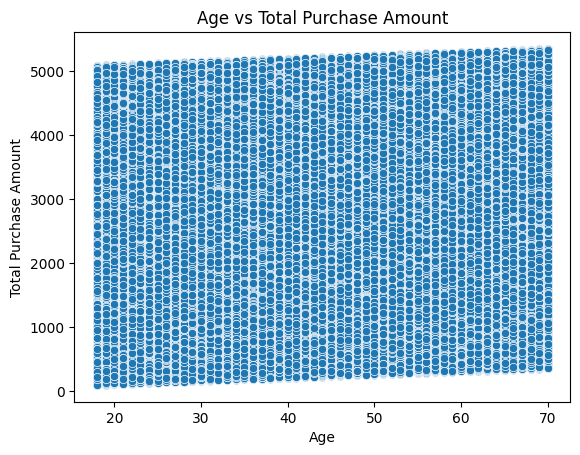

In [26]:
sns.scatterplot(data=df, x='Age', y='Total Purchase Amount')
plt.title("Age vs Total Purchase Amount")
plt.show()


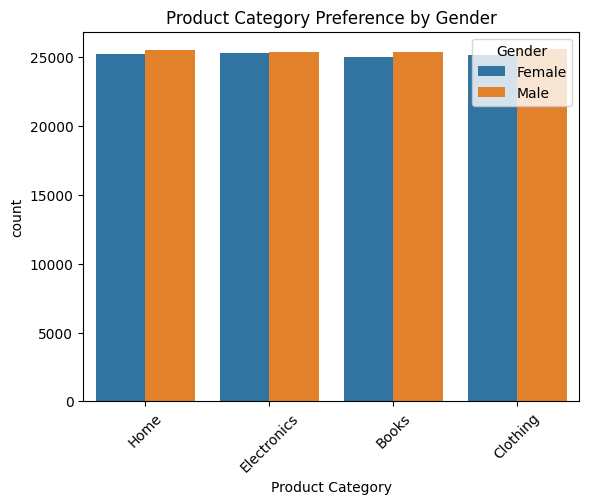

In [27]:
sns.countplot(data=df, x='Product Category', hue='Gender')
plt.title("Product Category Preference by Gender")
plt.xticks(rotation=45)
plt.show()


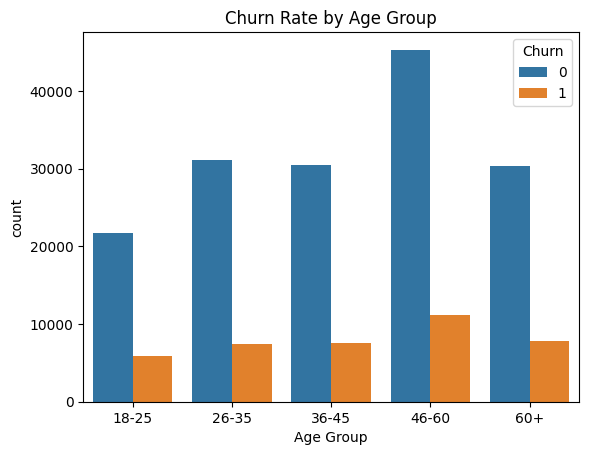

In [28]:
# Optional: Create age bins
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60, 100],
                         labels=['18-25', '26-35', '36-45', '46-60', '60+'])

sns.countplot(data=df, x='Age Group', hue='Churn')
plt.title("Churn Rate by Age Group")
plt.show()


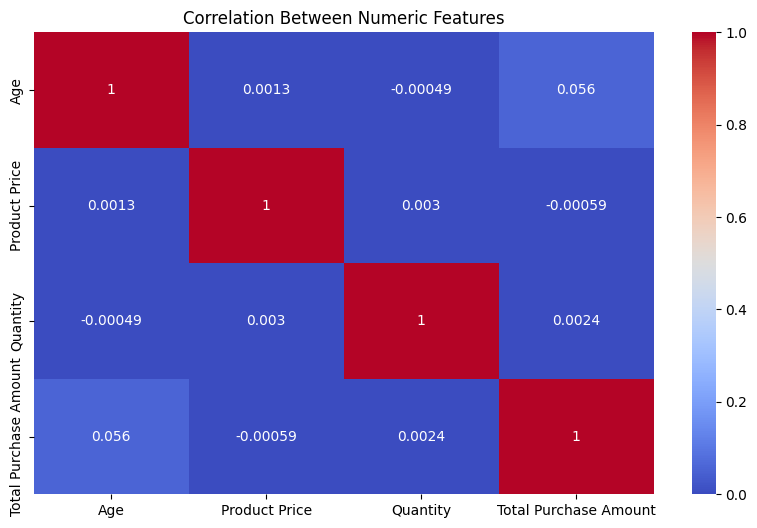

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Age', 'Product Price', 'Quantity', 'Total Purchase Amount']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()
